In [201]:
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns

def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d


def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """
    #Everything to lowercase
    s = s.lower()
    #Remove URL's
    s = sub(r'https?://[^\s]+','',s)
    #Remove @username (mentions)
    s = sub(r"([@#]\w+)",'',s)
    #Remove additional white spaces
    s = sub('[\s]+', ' ', s)
    #Replace #word with word
    s = sub(r'#([^\s]+)', r'\1', s)
    # remove rt
    s = sub(r'(([rt\s]+:)|([rt\s]+=:))', '', s)
    
    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!

    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 

    return s

In [202]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

In [203]:
X.map(clean_twitter)

0        here's cnn on sharia law. you can be stoned or have your hands cut off, but...
1        look obama clinton cronies illegally arm &amp; train muslims terrorist incl...
2                                                               from 2013 gets crowned 
3                                                       say 'islam is peace', or else! 
4                                                        all aboard the trump train! 🚂 
5          flashback &gt;&gt; judicial watch releases huma abedin deposition testimony 
6                following fbi presser, says “the system is rigged!” &amp; weigh in 7pm
7                                        trump: "we're running against a rigged press" 
8        literally 98% of hillary supporters i see online are astroturfed spammers w...
9                                                                           islam. ... 
10                                       . psycho - mother hillary at her most evil. h…
11       the unthinkable has hap

In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

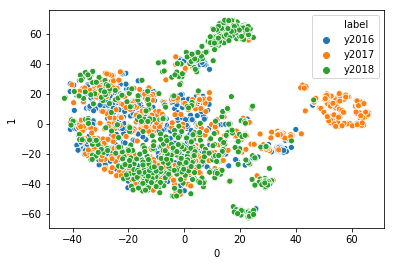

In [205]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

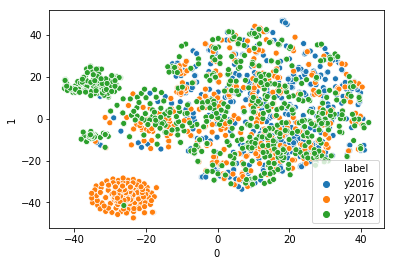

In [206]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

In [ ]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 

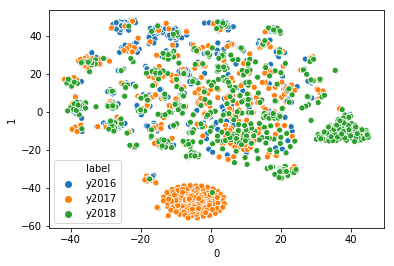

In [207]:
vectorizer = TfidfVectorizer(preprocessor = clean_twitter, stop_words = 'english')
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

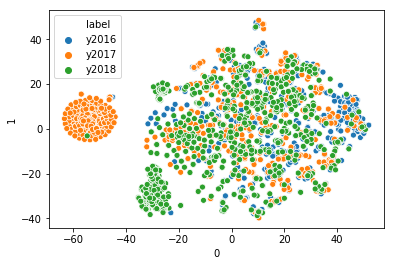

In [208]:
vectorizer = TfidfVectorizer(preprocessor = clean_twitter, stop_words = ['the', 'which', 'is', 'at', 'who', 'in', 'case', ':', ';'])
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)